# Analysing movie ratings from fandango.com

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong 

evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie 

ratings aggregator). He published his analysis in this article — a great piece of data journalism 

that's totally worth reading.


Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the 

maximum is 5 stars.


Hickey found that there's a significant discrepancy between the number of stars displayed to users and 

the actual rating, which he was able to find in the HTML of the page. He was able to find that:


The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie 

would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For 

instance, a 4.5 rating would be rounded off to 5 stars.

For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the 

page to a displayed rating of 5 stars.

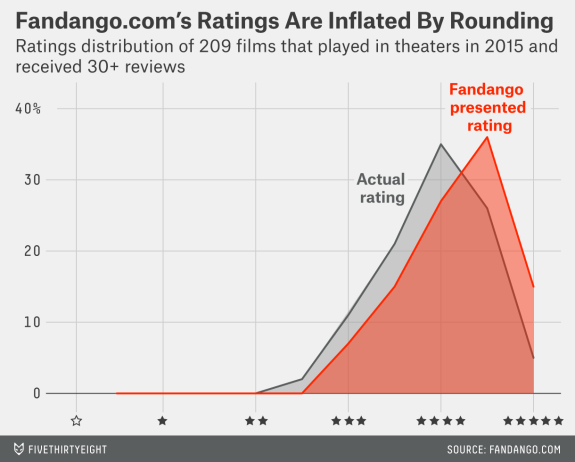


The two distributions above are displayed using a simple line plot, which is also a valid way to show 

the shape of a distribution. The variable being examined is movie rating, and for each unique rating we 

can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is 

intended for large audiences, relative frequencies (especially percentages) are preferred over absolute 

frequencies.


Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are 

generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. 

The distribution of displayed ratings is clearly shifted to the right compared to the actual rating 

distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather 

than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has 

already happened, although we can't tell for sure since the actual rating value doesn't seem to be 

displayed anymore in the pages' HTML.


In this project, we'll analyze more recent movie ratings data to determine whether there has been any 

change in Fandango's rating system after Hickey's analysis.

In [170]:
import pandas as pd
i=pd.read_csv('fandango_score_comparison.csv')
i

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [171]:
p=pd.read_csv('movie_ratings_16_17.csv')
p

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


For the data set with ratings previous to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.
For the other data set, select the the following columns: 'movie', 'year', 'fandango'

In [172]:
prev=i[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
aft=p[[ 'movie', 'year', 'fandango']]

In [173]:
prev['Fandango_Stars'].unique()

array([5. , 3.5, 4.5, 4. , 3. ])

In [174]:
aft.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [175]:
prev.sample(10,random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [176]:
k=[]
for i in prev['FILM']:
    if '2015' in i:
        k.append(2015)
        continue
    elif '2014' in i:
        k.append(2014)
        continue
    else:
        k.append(0)

In [177]:
prev['Year']=k

<ipython-input-177-1e3935f2717f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['Year']=k


In [178]:
import re
prev['FILM']=prev['FILM'].str.replace(r'[0-9]*','').str.replace('(','').str.replace(')','')

<ipython-input-178-eb05e4345601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev['FILM']=prev['FILM'].str.replace(r'[0-9]*','').str.replace('(','').str.replace(')','')


In [179]:
prev2015=prev[prev['Year']==2015]
prev2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine,3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out,4.5,4.5,15749,0.0,2015
141,Mr. Holmes,4.0,4.0,1348,0.0,2015
142,',3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem,3.5,3.5,59,0.0,2015


In [180]:
aft2016 = aft[aft['year']==2016]
aft2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


## comparing distribution shapes for 2015 and 2016

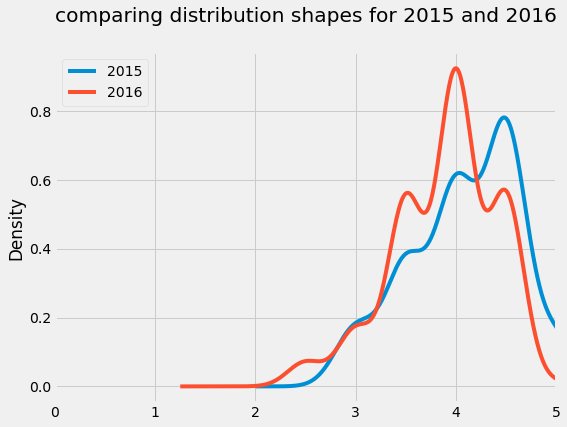

In [181]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

prev2015['Fandango_Stars'].plot.kde(label='2015',legend=True,figsize=(8,6))
aft2016['fandango'].plot.kde(label='2016',legend=True)
plt.title('comparing distribution shapes for 2015 and 2016',y=1.07)
plt.xlim(0,5)
plt.show()



Two aspects are striking on the figure above:

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## comparing relative frequencies

It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.

In [182]:
prev2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [183]:
aft['fandango'].value_counts(normalize=True).sort_index()*100

2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.



## Direction of change

In [184]:
meanprev = prev2015['Fandango_Stars'].mean()
meanaft = aft2016['fandango'].mean()

medianprev = prev2015['Fandango_Stars'].median()
medianaft = aft2016['fandango'].median()

modeprev = prev2015['Fandango_Stars'].mode()[0]
modeaft = aft2016['fandango'].mode()[0]

In [185]:
summary=pd.DataFrame()
summary['2015']=[meanprev,medianprev,modeprev]
summary['2016']=[meanaft,medianaft,modeaft]
summary.index=['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


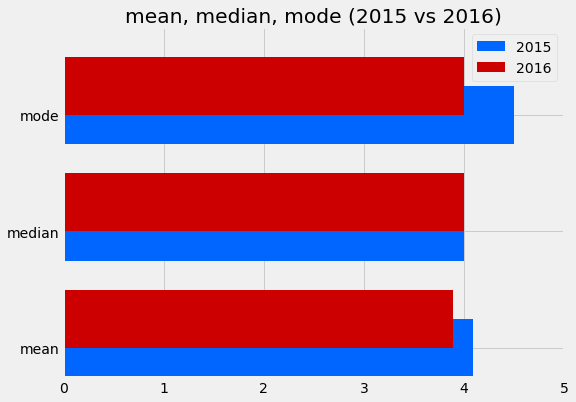

In [186]:
summary['2015'].plot(color='#0066FF',align='center',label='2015',kind='barh',figsize=(8,6),width=.5)
summary['2016'].plot(color='#CC0000',align='edge',label='2016',kind='barh')
plt.title('mean, median, mode (2015 vs 2016)')
plt.legend()
plt.xlim(0,5)
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.